### MARS - with outlier treament

In [133]:
### Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
pd.set_option('display.max_colwidth',-1)
#Set dataframe cloumns width to max
pd.set_option('display.max_columns', None)
# set seaborn theme if you prefer
sns.set(style="white")

In [134]:
master_data=pd.read_excel(r'train.xlsx',sheet_name='Sheet1')

In [135]:
master_data.head(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [136]:
master_data.drop(master_data.columns[0], axis=1,inplace=True)

In [137]:
## drop ID 
master_data.drop(master_data.columns[0], axis=1,inplace=True)

In [138]:
master_data.shape
### 3998 records with 37 features

(3998, 37)

In [139]:
## check for null
master_data.isnull().any().unique()

array([False])

In [140]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [141]:
master_data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [142]:
len(master_data.CollegeID.unique())

1350

In [143]:
len(master_data.CollegeTier.unique())

2

In [144]:
len(master_data['12graduation'].unique())

16

In [145]:
### collegeGPA. Some of the values are on a scale of 10 and rest in %. Convert all values to scale of 10.
master_data.collegeGPA=master_data.collegeGPA.apply(lambda x : x if ( x < 10) else x/10)

In [146]:
master_data.collegeGPA.describe()

count    3998.000000
mean     7.169573   
std      0.740663   
min      4.907000   
25%      6.650500   
50%      7.180000   
75%      7.640000   
max      9.993000   
Name: collegeGPA, dtype: float64

In [147]:
len(master_data.CollegeCityID.unique())

1350

In [148]:
master_data.CollegeCityTier.unique()

array([0, 1], dtype=int64)

In [149]:
master_data.English.unique()

array([515, 695, 615, 635, 545, 560, 590, 605, 565, 495, 380, 395, 485,
       685, 465, 455, 385, 370, 625, 575, 415, 535, 580, 475, 570, 430,
       450, 510, 425, 555, 300, 505, 440, 525, 420, 640, 444, 630, 665,
       675, 325, 405, 375, 315, 710, 345, 250, 350, 275, 360, 265, 595,
       585, 520, 500, 735, 765, 335, 490, 660, 355, 530, 365, 655, 730,
       445, 720, 645, 650, 875, 534, 454, 544, 295, 285, 435, 464, 705,
       554, 745, 280, 825, 290, 715, 310, 215, 700, 870, 305, 524, 755,
       790, 800, 205, 725, 780, 404, 770, 805, 180, 830, 795, 255, 324,
       775, 394, 240, 225, 850, 684, 334], dtype=int64)

In [150]:
master_data.Logical.unique()

array([585, 610, 545, 625, 555, 435, 670, 565, 455, 605, 580, 425, 520,
       530, 495, 445, 535, 360, 335, 510, 570, 375, 405, 485, 475, 525,
       640, 595, 560, 340, 395, 415, 465, 505, 385, 460, 410, 500, 645,
       480, 355, 450, 440, 470, 255, 305, 590, 630, 365, 350, 325, 400,
       205, 655, 295, 345, 390, 665, 515, 540, 680, 245, 620, 420, 575,
       635, 554, 315, 615, 215, 370, 300, 274, 685, 324, 675, 650, 464,
       684, 275, 334, 544, 454, 534, 404, 795, 285, 715, 700, 674, 690,
       695, 394, 270, 705, 310, 490, 330, 280, 735, 380, 290, 265, 240,
       195, 235, 660], dtype=int64)

In [151]:
master_data.Quant.unique()

array([525, 780, 370, 625, 465, 620, 380, 590, 530, 545, 565, 715, 470,
       645, 355, 515, 435, 445, 485, 270, 630, 575, 405, 605, 385, 695,
       450, 295, 430, 415, 635, 475, 460, 825, 500, 455, 554, 595, 495,
       665, 250, 310, 325, 390, 510, 535, 340, 440, 705, 534, 400, 395,
       570, 750, 330, 320, 454, 365, 615, 505, 425, 235, 210, 585, 810,
       555, 735, 560, 524, 690, 870, 765, 675, 520, 655, 305, 725, 840,
       650, 375, 720, 265, 280, 464, 404, 800, 680, 260, 674, 760, 345,
       335, 165, 685, 544, 215, 180, 795, 200, 860, 334, 285, 514, 195,
       494, 214, 275, 315, 324, 175, 684, 225, 740, 805, 444, 410, 135,
       255, 220, 755, 855, 145, 245, 885, 120, 900, 794, 775, 745, 504,
       820, 150, 710, 190, 185, 155, 580, 394], dtype=int64)

In [152]:
master_data.head(4)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,7.800,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,7.006,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,7.000,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,7.464,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194


In [153]:
len(master_data.Designation.unique())

419

In [154]:
len(master_data.JobCity.unique())

339

In [155]:
master_data.CollegeTier.unique()

array([2, 1], dtype=int64)

In [156]:
len(master_data.JobCity.unique())

339

In [157]:
master_data['DOJ_Yr']=master_data['DOJ'].dt.year

In [158]:
### drop DOJ
master_data.drop(['DOJ'],axis=1,inplace=True)

In [159]:
master_data['JobCity_1'] = master_data.JobCity.apply(lambda x : str(x).upper())
master_data.drop(['JobCity'],axis=1,inplace=True)
master_data.rename(columns={'JobCity_1': 'JobCity'},inplace=True)

In [160]:
city_tier=pd.read_csv(r'city_tier.csv',encoding = "ISO-8859-1")
city_tier

,JobCity,Tier
0,AGRA,Tier_2
1,AJMER,Tier_2
2,ALIGARH,Tier_2
3,AMRAVATI,Tier_2
4,AMRITSAR,Tier_2
...,...,...
123,DUBAI,Other
124,"AL JUBAIL,SAUDI ARABIA",Other
125,JEDDAH SAUDI ARABIA,Other
126,JOHANNESBURG,Other


In [161]:
master_data.JobCity.replace("BANGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BANAGALORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BENGALURU","BANGALORE",inplace=True)
master_data.JobCity.replace("BANAGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("BHUBANESHWAR","BHUBANESWAR",inplace=True)
master_data.JobCity.replace("BHUBNESHWAR","BHUBANESWAR",inplace=True)
master_data.JobCity.replace("NASIKCITY","NASHIK",inplace=True)

master_data.JobCity.replace("NOUDA","NOIDA",inplace=True)
master_data.JobCity.replace("TRICHY","TIRUCHIRAPPALLI",inplace=True)
master_data.JobCity.replace("PONDI","PONDICHERRY",inplace=True)
master_data.JobCity.replace("PONDY","PONDICHERRY",inplace=True)
master_data.JobCity.replace("HDERABAD","HYDERABAD",inplace=True)
master_data.JobCity.replace("PUNR","PUNE",inplace=True)
master_data.JobCity.replace("NEW DEHLI","NEW DELHI",inplace=True)
master_data.JobCity.replace("VIZAG","VISAKHAPATNAM",inplace=True)

master_data.JobCity.replace("GAZIABAAD","GHAZIABAD",inplace=True)
master_data.JobCity.replace("GAJIABAAD","GHAZIABAD",inplace=True)

master_data.JobCity.replace("ASIFABADBANGLORE","BANGALORE",inplace=True)
master_data.JobCity.replace("GURGOAN","GURGAON",inplace=True)
master_data.JobCity.replace("GURGA","GURGAON",inplace=True)
master_data.JobCity.replace("GURAGAON","GURGAON",inplace=True)

master_data.JobCity.replace("KOLKATA`","KOLKATA",inplace=True)
master_data.JobCity.replace("TRIVANDRUM","THIRUVANANTHAPURAM",inplace=True)
master_data.JobCity.replace("TECHNOPARK, TRIVANDRUM","THIRUVANANTHAPURAM",inplace=True)

master_data.JobCity=master_data.JobCity.apply(lambda x : x.rstrip().lstrip())

In [162]:
master_data=master_data.join(city_tier.set_index(['JobCity']), on='JobCity')

In [163]:
master_data.loc[master_data['JobCity']=="-1", 'Tier'] = "Tier_3"

In [164]:
master_data.loc[master_data['Tier'].isnull(),'Tier']= "Tier_3"

In [165]:
tier_nomap=master_data[master_data['Tier'].isnull()]
tier_nomap.JobCity.unique()

array([], dtype=object)

In [166]:
### Specialisation - transformation.
len(master_data.Specialization.unique())

46

In [167]:
master_data.Specialization.unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [168]:
specialisation=pd.read_csv(r'specialisation.csv')

In [169]:
specialisation.head(3)

,Specialization,Spec_Field
0,computer engineering,Computer
1,electronics and communication engineering,Electronics
2,information technology,IT


In [170]:
master_data=master_data.join(specialisation.set_index(['Specialization']), on='Specialization')

In [171]:
special_nomap=master_data[master_data['Spec_Field'].isnull()]
special_nomap.Spec_Field.unique()

array([], dtype=object)

In [172]:
##10board - transformation
len(master_data['10board'].unique())

275

In [173]:
tenboard=pd.read_csv(r'10board.csv')
tenboard.head(3)

,10board,10board_code
0,aisse,cbse
1,andhra pradesh board ssc,state
2,andhra pradesh state board,state


In [174]:
master_data=master_data.join(tenboard.set_index(['10board']), on='10board')

In [175]:
master_data.loc[master_data['10board']==0, '10board_code'] = "Other"

In [176]:
tenboard_nomap=master_data[master_data['10board_code'].isnull()]
len(tenboard_nomap)

0

In [177]:
### 12board - transformation

twelveboard=pd.read_csv(r'12thboard.csv')
twelveboard.head(3)

,12board,12board_code
0,board of intermediate,state
1,upboard,state
2,0,Other


In [178]:
master_data=master_data.join(twelveboard.set_index(['12board']), on='12board')
master_data.loc[master_data['12board']==0, '12board_code'] = "Other"
twelveboard_nomap=master_data[master_data['12board_code'].isnull()]
len(twelveboard_nomap)

0

In [179]:
### 12graduation - transformation
master_data['12graduation'].unique()

### 1995 - 2013
### B1 : 1995-2000 B2 : 2001-2006 B3 : 2007 -2013

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

In [180]:
### GraduationYear - transformation
master_data['GraduationYear'].unique()
master_data.loc[master_data['GraduationYear']==0, 'GraduationYear'] = 2014
### 2007 - 2016
## B1 : 2007 - 2010 
## B2 : 2011-2013 
## B3 : 2014-2016 

In [181]:
### Gap between 12th graduation and under graduation
master_data['gap_12_college_graduation']=master_data.GraduationYear - master_data['12graduation']

In [182]:
master_data['gap_12_college_graduation'].unique()

array([ 4,  5,  6,  7,  8,  3, 16,  9,  1,  2, 11, 10, 12,  0],
      dtype=int64)

In [183]:
### Gap between graduation and DOJ on first job
master_data['gap_grad_doj']=master_data['DOJ_Yr']-master_data['GraduationYear']

In [184]:
## DOJ_Yr - transformation
master_data['DOJ_Yr'].unique()
master_data['DOJ_Yr'].replace(1991,2013,inplace=True)
### Incorrect values seen 

In [185]:
### check if degree was got before DOJ 
master_data.loc[master_data['gap_grad_doj'] < 0, 'Deg_before_DOJ']=0
master_data.loc[master_data['gap_grad_doj'] >= 0, 'Deg_before_DOJ']=1
master_data.drop(['gap_grad_doj'],axis=1,inplace=True)

In [186]:
## Age when joining first job
master_data['Age_DOJ_Job']=master_data['DOJ_Yr'] - master_data['DOB'].dt.year
master_data['Age_DOJ_Job'].replace(0, 22,inplace=True)
master_data['Age_DOJ_Job'].replace(12, 22,inplace=True)
master_data.loc[(master_data.Age_DOJ_Job == 19) & (master_data.Deg_before_DOJ == 1), 'Age_DOJ_Job']=23
master_data.loc[(master_data.Age_DOJ_Job == 18) & (master_data.Deg_before_DOJ == 1), 'Age_DOJ_Job']=23

In [187]:
##3 merge GDP data
gdp=pd.read_csv(r'GDP.csv')
master_data=master_data.join(gdp.set_index(['DOJ_Yr']), on='DOJ_Yr')
gdp_nomap=master_data[master_data['GDP-constant'].isnull()]
len(gdp_nomap)

0

In [188]:
len(master_data[master_data.Domain == -1])

248

In [189]:
### AMCAT test - Domain- missing values imputed using mean
master_data.Domain.replace(-1,np.nan,inplace=True)
master_data.Domain.mean()

0.6088119432219345

In [190]:
master_data.Domain.replace(np.nan,0.6088119432219345, inplace=True)

In [191]:
### replace Gender values with 0/1
master_data.Gender=master_data.Gender.apply(lambda x : 1 if ( x =='f') else 0)

In [192]:
degree=pd.get_dummies(master_data['Degree'],drop_first=False)
master_data=pd.concat([master_data,degree],axis=1)

In [193]:
master_data.drop(['Degree'],axis=1,inplace=True)

In [194]:
CollegeState=pd.get_dummies(master_data['CollegeState'],drop_first=False)
master_data=pd.concat([master_data,CollegeState],axis=1)

In [195]:
master_data.drop(['CollegeState'],axis=1,inplace=True)

In [196]:
## drop designation as it cannot be driver.
master_data.drop(['Designation'],axis=1,inplace=True)

In [197]:
tier_dummies=pd.get_dummies(master_data['Tier'],drop_first=False).rename(columns=lambda x: 'JobCityTier-' + str(x))
master_data=pd.concat([master_data,tier_dummies],axis=1)
master_data.drop(['Tier','JobCity'],axis=1,inplace=True)

In [198]:
special_dummies=pd.get_dummies(master_data['Spec_Field'],drop_first=False).rename(columns=lambda x: 'Specialisation-' + str(x))
master_data=pd.concat([master_data,special_dummies],axis=1)

In [199]:
master_data.drop(['Specialization','Spec_Field'],axis=1,inplace=True)

In [200]:
ten_dummies=pd.get_dummies(master_data['10board_code'],drop_first=False).rename(columns=lambda x: '10board-' + str(x))
master_data=pd.concat([master_data,ten_dummies],axis=1)

In [201]:
master_data.drop(['10board','10board_code'],axis=1,inplace=True)

In [202]:
twelboard_dummies=pd.get_dummies(master_data['12board_code'],drop_first=False).rename(columns=lambda x: '12board-' + str(x))
master_data=pd.concat([master_data,twelboard_dummies],axis=1)

In [203]:
master_data.drop(['12board','12board_code'],axis=1,inplace=True)

In [204]:
### Dropping DOL 
master_data.drop(['DOL'],axis=1,inplace=True)

In [205]:
master_data.drop(['Category','Year'],axis=1,inplace=True)

In [206]:
CollegeTier_dummies=pd.get_dummies(master_data['CollegeTier'],drop_first=False).rename(columns=lambda x: 'CollegeTier-' + str(x))
master_data=pd.concat([master_data,CollegeTier_dummies],axis=1)

### Data for Model building

In [207]:
master_data.head(4)

,Salary,Gender,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOJ_Yr,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
0,420000,1,1990-02-19,84.3,2007,95.8,1141,2,7.800,1141,0,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455,2012,4,1.0,22,9213017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,500000,0,1989-10-04,85.4,2007,85.0,5807,2,7.006,5807,0,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,2013,5,1.0,24,9801370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,325000,1,1992-08-03,85.0,2010,68.2,64,2,7.000,64,0,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721,2014,4,1.0,22,10527674,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1100000,0,1989-12-05,85.6,2007,83.6,6920,1,7.464,6920,1,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,2011,4,1.0,22,8736331,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [208]:
master_data.describe()

,Salary,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOJ_Yr,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
count,4.042000e+03,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.00000,4042.000000,4042.000000,4042.000000,4.042000e+03,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,3.081047e+05,0.240722,77.961282,2008.078427,74.570740,5165.155121,1.926522,7.170910,5165.155121,0.303068,2012.598961,501.018308,501.192974,513.262246,0.608812,353.465858,95.565067,89.814201,22.713756,16.288471,32.233548,2.643741,-0.035748,0.147719,0.003711,-0.167636,-0.137874,2013.03711,4.520534,0.980208,22.623701,9.926272e+06,0.925037,0.000495,0.013607,0.060861,0.058387,0.001237,0.002474,0.006680,0.040079,0.000247,0.005938,0.044532,0.003958,0.001732,0.006927,0.091539,0.008164,0.046759,0.064819,0.000495,0.042553,0.047749,0.043048,0.000742,0.091044,0.085106,0.001237,0.228105,0.027956,0.048491,0.002474,0.557645,0.278822,0.161059,0.004206,0.400297,0.027214,0.323850,0.172934,0.055666,0.015834,0.087828,0.348095,0.070757,0.014102,0.479218,0.000742,0.088817,0.352548,0.044285,0.513607,0.073478,0.926522
std,2.128575e+05,0.427575,9.842506,1.651388,11.040046,4795.366444,0.260953,0.739958,4795.366444,0.459641,1.316798,104.924046,86.787913,122.164831,0.265038,205.075621,158.253987,174.596956,97.619359,87.126380,105.501686,36.460387,1.026728,0.940282,0.949614,1.006319,1.005685,1.28325,1.004912,0.139303,1.294789,7.919006e+05,0.263364,0.022241,0.115868,0.239105,0.234503,0.035154,0.049684,0.081467,0.196169,0.015729,0.076837,0.206300,0.062799,0.041584,0.082952,0.288410,0.089998,0.211148,0.246237,0.022241,0.201872,0.213260,0.202990,0.027237,0.287707,0.279074,0.035154,0.419663,0.164868,0.214828,0.049684,0.496727,0.448475,0.367631,0.064724,0.490019,0.162727,0.468001,0.378237,0.229303,0.124847,0.283079,0.476425,0.256450,0.117926,0.499630,0.027237,0.284515,0.477823,0.205753,0.499877,0.260953,0.260953
min,3.500000e+04,0.000000,43.000000,1995.000000,40.000000,2.000000,1.000000,4.907000,2.000000,0.000000,2007.000000,180.000000,195.000000,120.000000,0.002750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,

In [209]:
model_data=master_data.copy()

In [210]:
model_data.drop(['CollegeCityID','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'],axis=1,inplace=True)

In [211]:
model_data.head(4)

,Salary,Gender,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOJ_Yr,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
0,420000,1,1990-02-19,84.3,2007,95.8,1141,2,7.800,0,2011,515,585,525,0.635979,0.9737,0.8128,0.5269,1.3549,-0.4455,2012,4,1.0,22,9213017,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,500000,0,1989-10-04,85.4,2007,85.0,5807,2,7.006,0,2012,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.1076,0.8637,2013,5,1.0,24,9801370,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,325000,1,1992-08-03,85.0,2010,68.2,64,2,7.000,0,2014,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.8682,0.6721,2014,4,1.0,22,10527674,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1100000,0,1989-12-05,85.6,2007,83.6,6920,1,7.464,1,2011,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.4078,-0.9194,2011,4,1.0,22,8736331,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [212]:
model_data.drop(['CollegeTier','12graduation','CollegeID','GraduationYear','DOJ_Yr'],axis=1,inplace=True)

In [213]:
model_data.drop(['DOB'],axis=1,inplace=True)

In [214]:
#model_data.drop(['ID'],axis=1,inplace=True)

### Outlier check

In [215]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 3997
Data columns (total 72 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Salary                                     4042 non-null   int64  
 1   Gender                                     4042 non-null   int64  
 2   10percentage                               4042 non-null   float64
 3   12percentage                               4042 non-null   float64
 4   collegeGPA                                 4042 non-null   float64
 5   CollegeCityTier                            4042 non-null   int64  
 6   English                                    4042 non-null   int64  
 7   Logical                                    4042 non-null   int64  
 8   Quant                                      4042 non-null   int64  
 9   Domain                                     4042 non-null   float64
 10  conscientiousness       

In [216]:
model_data.describe()

,Salary,Gender,10percentage,12percentage,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
count,4.042000e+03,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4.042000e+03,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,3.081047e+05,0.240722,77.961282,74.570740,7.170910,0.303068,501.018308,501.192974,513.262246,0.608812,-0.035748,0.147719,0.003711,-0.167636,-0.137874,4.520534,0.980208,22.623701,9.926272e+06,0.925037,0.000495,0.013607,0.060861,0.058387,0.001237,0.002474,0.006680,0.040079,0.000247,0.005938,0.044532,0.003958,0.001732,0.006927,0.091539,0.008164,0.046759,0.064819,0.000495,0.042553,0.047749,0.043048,0.000742,0.091044,0.085106,0.001237,0.228105,0.027956,0.048491,0.002474,0.557645,0.278822,0.161059,0.004206,0.400297,0.027214,0.323850,0.172934,0.055666,0.015834,0.087828,0.348095,0.070757,0.014102,0.479218,0.000742,0.088817,0.352548,0.044285,0.513607,0.073478,0.926522
std,2.128575e+05,0.427575,9.842506,11.040046,0.739958,0.459641,104.924046,86.787913,122.164831,0.265038,1.026728,0.940282,0.949614,1.006319,1.005685,1.004912,0.139303,1.294789,7.919006e+05,0.263364,0.022241,0.115868,0.239105,0.234503,0.035154,0.049684,0.081467,0.196169,0.015729,0.076837,0.206300,0.062799,0.041584,0.082952,0.288410,0.089998,0.211148,0.246237,0.022241,0.201872,0.213260,0.202990,0.027237,0.287707,0.279074,0.035154,0.419663,0.164868,0.214828,0.049684,0.496727,0.448475,0.367631,0.064724,0.490019,0.162727,0.468001,0.378237,0.229303,0.124847,0.283079,0.476425,0.256450,0.117926,0.499630,0.027237,0.284515,0.477823,0.205753,0.499877,0.260953,0.260953
min,3.500000e+04,0.000000,43.000000,40.000000,4.907000,0.000000,180.000000,195.000000,120.000000,0.002750,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000,0.000000,17.000000,5.480380e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000e+05,0.000000,71.800000,66.000000,6.660000,0.000000,425.000000,445.000000,430.000000,0.380092,-0.649100,-0.287100,-0.604800,-0.8

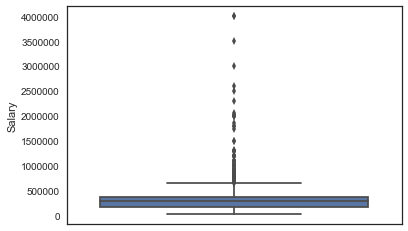

In [217]:
sns.boxplot(y='Salary',data=master_data)

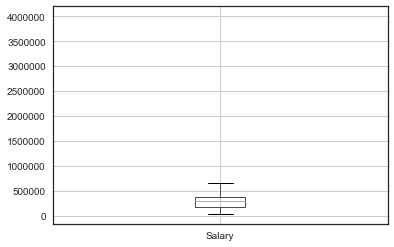

In [218]:
boxplot = model_data.boxplot(column=['Salary'])

In [219]:
### remove records with salary more than 3 times SD.

#len(model_data.loc[(model_data.Salary <= 3*2.128575e+05)])

In [220]:
##model_data=model_data.loc[(model_data.Salary <= 3*2.128575e+05)]

In [221]:
Q1,Q3 = np.percentile(model_data.Salary , [25,75])
IQR = Q3- Q1
model_data=model_data.loc[(model_data.Salary >= Q1 - (1.5 * IQR))]
model_data=model_data.loc[(model_data.Salary <= Q3 + (1.5 * IQR))]
model_data.describe()

,Salary,Gender,10percentage,12percentage,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
count,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000
mean,285632.061069,0.242748,77.891954,74.521079,7.163669,0.302545,499.985496,500.418321,511.454707,0.605407,-0.029746,0.142995,0.001732,-0.161565,-0.137611,4.513995,0.979898,22.618066,9.942307e+06,0.926209,0.000509,0.012723,0.060560,0.059542,0.001018,0.002545,0.006870,0.038677,0.000254,0.005344,0.044529,0.004071,0.001781,0.005598,0.092621,0.008397,0.046310,0.065140,0.000254,0.043003,0.047328,0.043511,0.000763,0.091603,0.085242,0.001272,0.227735,0.027481,0.049109,0.000763,0.559033,0.278372,0.161832,0.004326,0.398982,0.026972,0.327226,0.174046,0.054198,0.014249,0.086260,0.347583,0.069466,0.013995,0.482697,0.000763,0.087277,0.352417,0.043511,0.516031,0.066921,0.933079
std,126740.853999,0.428799,9.841327,11.038992,0.736014,0.459418,104.745308,86.463209,121.437723,0.265149,1.026179,0.942664,0.950533,1.007795,1.008743,0.997290,0.140366,1.290737,7.815603e+05,0.261464,0.022556,0.112089,0.238551,0.236666,0.031891,0.050386,0.082612,0.192848,0.015952,0.072913,0.206294,0.063684,0.042172,0.074619,0.289937,0.091261,0.210183,0.246804,0.015952,0.202889,0.212367,0.204031,0.027622,0.288501,0.279277,0.035651,0.419424,0.163501,0.216124,0.027622,0.496566,0.448254,0.368344,0.065636,0.489751,0.162022,0.469260,0.379197,0.226438,0.118532,0.280783,0.476263,0.254277,0.117484,0.499764,0.027622,0.282277,0.477784,0.204031,0.499807,0.249917,0.249917
min,35000.000000,0.000000,43.000000,40.000000,4.907000,0.000000,180.000000,195.000000,120.000000,0.002750,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000,0.000000,17.000000,5.480380e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180000.000000,0.000000,71.670000,66.000000,6.650000,0.000000,425.000000,445.000000,430.000000,0.377551,-0.589900,-0.287100,-0.604800,-0

###  Test - Train split

In [222]:
model_data.shape

(3930, 72)

In [223]:
from sklearn.model_selection import train_test_split
X = model_data.drop(['Salary'], axis=1)
y=model_data['Salary']

In [224]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [225]:
X_train.shape


(2751, 71)

In [226]:
X_test.shape


(1179, 71)

In [227]:
y_train.shape


(2751,)

In [228]:
y_test.shape

(1179,)

### Feature Scaling

In [229]:
cols_scale=['10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness',
           'extraversion','nueroticism','openess_to_experience','gap_12_college_graduation','Age_DOJ_Job','GDP-constant']


In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_scale]= scaler.fit_transform(X_train[cols_scale])
X_train.head(4)

,Gender,10percentage,12percentage,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,gap_12_college_graduation,Deg_before_DOJ,Age_DOJ_Job,GDP-constant,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Meghalaya,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Union Territory,Uttar Pradesh,Uttarakhand,West Bengal,JobCityTier-Other,JobCityTier-Tier_1,JobCityTier-Tier_2,JobCityTier-Tier_3,Specialisation-Biotech,Specialisation-Computer,Specialisation-Electrical_Instrumentation,Specialisation-Electronics,Specialisation-IT,Specialisation-Mechanical,Specialisation-Others,10board-Other,10board-cbse,10board-icse,10board-matric,10board-state,12board-IB,12board-Other,12board-cbse,12board-icse,12board-state,CollegeTier-1,CollegeTier-2
3597,1,-1.290236,-1.864460,-0.763842,0,-0.915130,-0.869074,-0.857835,0.014717,0.978674,-0.445456,-1.268930,-0.716917,0.614372,0.489767,1.0,0.291475,-2.125669,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2017,0,-0.053299,-0.292686,0.330809,0,-0.430633,-0.060595,-1.146283,-2.117530,0.150328,-1.163264,-0.146519,0.304219,0.028809,0.489767,0.0,-2.039479,-1.566646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2923,0,-1.087459,-0.128198,-0.924230,0,1.507354,-0.638080,0.131128,-1.113386,-0.686933,1.382726,0.252000,0.455240,-0.315836,0.489767,1.0,0.291475,-0.954188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3681,0,-0.108048,0.511477,0.480504,0,0.441461,0.285896,1.985433,1.336887,-0.553202,-0.276391,-1.435023,-0.454476,-1.099432,0.489767,1.0,0.291475,-0.198257,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


### Build Model - MARS

In [231]:
from pyearth import Earth
#Fit an Earth model
model_mars = Earth()
model_mars.fit(X_train,y_train)

Earth(allow_linear=None, allow_missing=False, check_every=None,
      enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
      fast_h=None, feature_importance_type=None, max_degree=None,
      max_terms=None, min_search_points=None, minspan=None, minspan_alpha=None,
      penalty=None, smooth=None, thresh=None, use_fast=None, verbose=0,
      zero_tol=None)

###### max_terms : default=min(2 * n + m // 10, 400)) =  ( 2*71 + 2751 //10) --> 289
#max_degree : int, optional (default=1)
# allow_missing : boolean, optional (default=False)

penalty : float, optional (default=3.0)
endspan_alpha : float, optional, probability between 0 and 1 (default=0.05)
endspan : int, optional (default=-1)
minspan_alpha : float, optional, probability between 0 and 1 (default=0.05)
minspan : int, optional (default=-1)
thresh : float, optional (default=0.001)
zero_tol : float, optional (default=1e-12)
min_search_points : int, optional (default=100)
check_every : int, optional (default=-1)
allow_linear : bool, optional (default=True)
use_fast : bool, optional (default=False)
fast_K : int, optional (default=5)
fast_h : int, optional (default=1)
enable_pruning : bool, optional(default=True
smooth : bool, optional (default=False)
feature_importance_type: string or list of strings, optional (default=None)
verbose : int, optional(default=0)


In [232]:
model_mars.get_params()

{'allow_linear': None,
 'allow_missing': False,
 'check_every': None,
 'enable_pruning': True,
 'endspan': None,
 'endspan_alpha': None,
 'fast_K': None,
 'fast_h': None,
 'feature_importance_type': None,
 'max_degree': None,
 'max_terms': None,
 'min_search_points': None,
 'minspan': None,
 'minspan_alpha': None,
 'penalty': None,
 'smooth': None,
 'thresh': None,
 'use_fast': None,
 'verbose': 0,
 'zero_tol': None}

In [233]:
print(model_mars.summary())

Earth Model
------------------------------------------------
Basis Function             Pruned  Coefficient  
------------------------------------------------
(Intercept)                No      248272       
Quant                      No      18949.5      
GDP-constant               No      -30409.6     
10percentage               No      12584.5      
collegeGPA                 Yes     None         
English                    No      15990.2      
JobCityTier-Tier_1         No      34423.8      
12board-state              Yes     None         
Domain                     No      7447.23      
12percentage               No      16088.5      
Gender                     No      -25458.1     
Deg_before_DOJ             No      37145        
Tamil Nadu                 No      -51332.3     
West Bengal                No      -52938.6     
h(Age_DOJ_Job-3.39941)     Yes     None         
h(3.39941-Age_DOJ_Job)     No      -11478.1     
Specialisation-IT          No      26118.6      
CollegeT

In [234]:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

In [235]:
y_pred_mars=model_mars.predict(X_test)

In [236]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
mars_RMSE=sqrt(mean_squared_error(y_test,y_pred_mars))
mars_RMSE 

108388.60121945005

In [237]:
MAPE_mars=np.mean(np.abs((y_test - y_pred_mars) / y_test)) * 100
MAPE_mars

40.900891786421404

In [238]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_mars)

84216.25013323962

In [239]:
from sklearn.model_selection import GridSearchCV
model_earth=Earth()

In [240]:
# setting the range of hyperparameters
folds=5
hyper_params = [{'smooth': [False,True], 'max_terms':[50,100,150,200], 'penalty':[1.5,2]}]
scoring_params=['neg_mean_absolute_error','neg_mean_squared_error']
# specify model
model_earth = Earth()

#set up GridSearchCV()
model_cv_earth = GridSearchCV(estimator = model_earth, 
                        n_jobs=-1,
                        param_grid = hyper_params, 
                        scoring= scoring_params, 
                        refit='neg_mean_squared_error',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
model_cv_earth.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Earth(allow_linear=None, allow_missing=False,
                             check_every=None, enable_pruning=True,
                             endspan=None, endspan_alpha=None, fast_K=None,
                             fast_h=None, feature_importance_type=None,
                             max_degree=None, max_terms=None,
                             min_search_points=None, minspan=None,
                             minspan_alpha=None, penalty=None, smooth=None,
                             thresh=None, use_fast=None, verbose=0,
                             zero_tol=None),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_terms': [50, 100, 150, 200], 'penalty': [1.5, 2],
                          'smooth': [False, True]}],
             pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
             return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
 

In [241]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_earth.best_score_
best_hyperparams = model_cv_earth.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is -11250732384.054466 corresponding to hyperparameters {'max_terms': 50, 'penalty': 1.5, 'smooth': True}


In [242]:
cv_results = pd.DataFrame(model_cv_earth.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_terms,param_penalty,param_smooth,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error
0,10.543154,2.187321,0.008995,0.002606,50,1.5,False,"{'max_terms': 50, 'penalty': 1.5, 'smooth': False}",-84001.192844,-81073.246633,-88098.328785,-83944.165296,-83186.033758,-84060.593463,2280.766811,13,-81623.151734,-82867.366698,-80843.666337,-81933.236114,-82047.720165,-81863.028210,654.885550,-1.147554e+10,-1.036866e+10,-1.245536e+10,-1.097393e+10,-1.127638e+10,-1.130997e+10,6.840222e+08,9,-1.058977e+10,-1.092189e+10,-1.043502e+10,-1.076557e+10,-1.067371e+10,-1.067719e+10,1.637011e+08
1,8.040589,1.439287,0.008794,0.002226,50,1.5,True,"{'max_terms': 50, 'penalty': 1.5, 'smooth': True}",-83963.974056,-80836.276581,-87798.411749,-83529.424806,-82964.493433,-83818.516125,2261.300884,5,-81689.973664,-82803.038763,-80995.063203,-81924.080428,-82026.349398,-81887.701091,582.114833,-1.149610e+10,-1.032060e+10,-1.236861e+10,-1.081142e+10,-1.125693e+10,-1.125073e+10,6.881891e+08,1,-1.060991e+10,-1.094106e+10,-1.046815e+10,-1.079036e+10,-1.068061e+10,-1.069802e+10,1.603121e+08
2,7.292418,1.302833,0.006596,0.000491,50,2,False,"{'max_terms': 50, 'penalty': 2, 'smooth': False}",-83893.189753,-81195.051008,-88077.521544,-83874.341936,-83220.395906,-84052.100030,2241.219741,9,-82043.127461,-82946.242110,-80846.763446,-82097.764813,-82064.713704,-81999.722307,669.467564,-1.148896e+10,-1.037897e+10,-1.244068e+10,-1.098528e+10,-1.128777e+10,-1.131633e+10,6.757243e+08,13,-1.066758e+10,-1.094061e+10,-1.045342e+10,-1.080392e+10,-1.067874e+10,-1.070885e+10,1.616226e+08
3,6.768119,1.207582,0.006597,0.000490,50,2,True,"{'max_terms': 50, 'penalty': 2, 'smooth': True}",-83792.914571,-80965.354129,-87782.262718,-83480.300392,-83001.210591,-83804.408480,2219.633256,1,-82032.637927,-82867.533783,-80999.446630,-82082.344148,-82046.771929,-82005.746884,593.900696,-1.148906e+10,-1.032352e+10,-1.235341e+10,-1.083095e+10,-1.126246e+10,-1.125188e+10,6.795227e+08,5,-1.066911e+10,-1.095312e+10,-1.048677e+10,-1.082803e+10,-1.068482e+10,-1.072437e+10,1.575722e+08
4,8.134534,1.360184,0.008795,0.004705,100,1.5,False,"{'max_terms': 100, 'penalty': 1.5, 'smooth': False}",-84001.192844,-81073.246633,-88098.328785,-83944.165296,-83186.033758,-84060.593463,2280.766811,13,-81623.151734,-82867.366698,-80843.666337,-81933.236114,-82047.720165,-81863.028210,654.885550,-1.147554e+10,-1.036866e+10,-1.245536e+10,-1.097393e+10,-1.127638e+10,-1.130997e+10,6.840222e+08,9,-1.058977e+10,-1.092189e+10,-1.043502e+10,-1.076557e+10,-1.067371e+10,-1.067719e+10,1.637011e+08


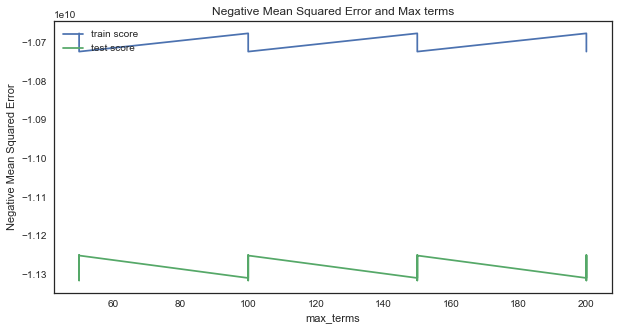

In [243]:

cv_results['param_max_terms'] = cv_results['param_max_terms'].astype('int32')

# plotting
plt.figure(figsize=(10,5))
plt.plot(cv_results['param_max_terms'], cv_results['mean_train_neg_mean_squared_error'])
plt.plot(cv_results['param_max_terms'], cv_results['mean_test_neg_mean_squared_error'])
plt.xlabel('max_terms')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and Max terms")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [244]:
y_pred_mars=model_cv_earth.predict(X_test)

In [245]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
mars_RMSE=sqrt(mean_squared_error(y_test,y_pred_mars))
mars_RMSE 

108327.86301093531

In [246]:
MAPE_mars=np.mean(np.abs((y_test - y_pred_mars) / y_test)) * 100
MAPE_mars

40.91224730227185

In [247]:
mean_absolute_error(y_test,y_pred_mars)

84168.89741974235

### Model based on hyper-parameter from earlier research paper

In [248]:
### model based on parameters in the research paper
model_cv_earth_paper=Earth(max_degree=1, max_terms=19, penalty=-1, thresh=0.001)
model_cv_earth_paper.fit(X_train,y_train)

Earth(allow_linear=None, allow_missing=False, check_every=None,
      enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
      fast_h=None, feature_importance_type=None, max_degree=1, max_terms=19,
      min_search_points=None, minspan=None, minspan_alpha=None, penalty=-1,
      smooth=None, thresh=0.001, use_fast=None, verbose=0, zero_tol=None)

In [249]:
y_pred_mars_paper=model_cv_earth_paper.predict(X_test)

In [250]:
mars_RMSE=sqrt(mean_squared_error(y_test,y_pred_mars_paper))
mars_RMSE

109733.08539076612

In [251]:
MAPE_mars=np.mean(np.abs((y_test - y_pred_mars_paper) / y_test)) * 100
MAPE_mars

41.51220349100605

In [252]:
mean_absolute_error(y_test,y_pred_mars_paper)

85268.7139638545

### Final MARS Model

In [253]:
criteria = ('rss', 'gcv', 'nb_subsets')
mars=Earth(max_terms=50, penalty=2, smooth=True,feature_importance_type=criteria)
mars.fit(X_train,y_train)
print(mars.summary())

Earth Model
---------------------------------------------------------------------
Basis Function                                  Pruned  Coefficient  
---------------------------------------------------------------------
(Intercept)                                     No      256379       
Quant                                           No      18903.6      
GDP-constant                                    No      -30407.9     
C(10percentage|s=+1,-1.68565,0.149478,1.05792)  No      9067.28      
C(10percentage|s=-1,-1.68565,0.149478,1.05792)  No      -14383.3     
English                                         No      15997.1      
collegeGPA                                      Yes     None         
JobCityTier-Tier_1                              No      34459.8      
12board-state                                   Yes     None         
Domain                                          No      7441.44      
12percentage                                    No      16137.6      
Gender  

In [254]:
result=mars.summary()
type(result)

str

In [255]:
y_pred_mars=mars.predict(X_test)

In [256]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
mars_RMSE=sqrt(mean_squared_error(y_test,y_pred_mars))
mars_RMSE 

108327.8630109353

In [257]:
MAPE_mars=np.mean(np.abs((y_test - y_pred_mars) / y_test)) * 100
MAPE_mars

40.91224730227185

In [258]:
mean_absolute_error(y_test,y_pred_mars)

84168.89741974235

In [259]:
print(mars.trace())

Forward Pass
-----------------------------------------------------------------------------------
iter  parent  var  knot  mse                 terms  gcv              rsq    grsq   
-----------------------------------------------------------------------------------
0     -       -    -     15922103332.174517  1      15933685149.091  0.000  0.000  
1     0       7    -1    13851466309.836798  2      13881726194.452  0.130  0.129  
2     0       17   -1    13126505989.298903  3      13174351788.859  0.176  0.173  
3     0       1    2371  12391974651.556650  5      12473455909.261  0.222  0.217  
4     0       5    -1    12175906444.863640  6      12273865436.442  0.235  0.230  
5     0       3    -1    11942746189.130100  7      12056423527.926  0.250  0.243  
6     0       49   -1    11744938158.853893  8      11874073396.935  0.262  0.255  
7     0       68   -1    11622557175.199268  9      11767544562.587  0.270  0.261  
8     0       8    -1    11530121804.640450  10     11691054524

In [260]:
print(mars.summary_feature_importances(sort_by='gcv'))

                                              rss    gcv    nb_subsets
Quant                                         0.40   0.43   0.04          
GDP-constant                                  0.14   0.15   0.04          
12percentage                                  0.12   0.13   0.04          
English                                       0.06   0.07   0.04          
collegeGPA                                    0.05   0.04   0.11          
JobCityTier-Tier_1                            0.04   0.04   0.04          
Gender                                        0.02   0.02   0.04          
Tamil Nadu                                    0.02   0.02   0.04          
gap_12_college_graduation                     0.02   0.02   0.04          
Telangana                                     0.02   0.01   0.04          
West Bengal                                   0.01   0.01   0.04          
12board-Other                                 0.01   0.01   0.04          
Specialisation-IT            